<a href="https://colab.research.google.com/github/jorge-flores-py/CODER_ProyectoDS/blob/main/ProyectoDSParteI_FLORES_F_GARROT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="color:#007acc; text-align:center;">📡 Telecomunicaciones y Análisis de Churn</h1>

<img src="cc3b7d92-b5c5-4c8c-91a7-fbfca80468bc.png" width="600"/>

<p style="color:#555555; font-size:16px;">
El objetivo de este proyecto es identificar patrones de cancelación de clientes utilizando análisis exploratorio de datos y técnicas de machine learning aplicadas a una empresa de telecomunicaciones.
</p>



<h2 style="color:#1E90FF;">1. Abstract (Análisis Exploratorio)🕵️</h2>

<p style="font-size:16px; color:#444444; text-align:justify;">
En este proyecto, se trabajará con el conjunto de datos de <strong>Telco Customer Churn</strong>, el cual contiene información de clientes de una compañía de telecomunicaciones, incluyendo características demográficas (género, edad, si tiene pareja o dependientes), servicios contratados (servicios de internet, seguridad en línea, respaldo de datos, soporte técnico, streaming), tipo de contrato, método de pago, cargos mensuales, cargos totales, y finalmente, si el cliente se ha dado de baja (<strong>Churn</strong>).
</p>

<p style="font-size:16px; color:#444444; text-align:justify;">
En la fase de análisis exploratorio de datos (EDA), se realizó:
<ul>
<li>Visualización de las primeras filas del dataset para entender la estructura de los datos.</li>
<li>Revisión de los tipos de datos de cada columna para detectar posibles errores o conversiones necesarias.</li>
<li>Identificación de valores nulos o datos faltantes para su posterior tratamiento.</li>
</ul>
</p>

<p style="font-size:16px; color:#444444; text-align:justify;">
Los resultados preliminares mostraron que la mayoría de los campos no presentan nulos, salvo algunas inconsistencias menores en la columna de <strong>TotalCharges</strong>, donde se detectaron valores vacíos.
</p>

<p style="font-size:16px; color:#444444; text-align:justify;">
Este análisis permitirá en una fase posterior la utilización de modelos de <strong>Machine Learning</strong> como árboles de decisión, random forest o modelos de regresión logística para predecir la probabilidad de que un cliente abandone el servicio, basándonos en sus características.
</p>


<h2 style="color:#1E90FF;">2. Preguntas e Hipótesis🕵️🔍🔎</h2>

<h3 style="color:#007acc;">Preguntas de investigación:</h3>

<ul style="font-size:16px; color:#444444;">
  <li>¿Los clientes con contratos mensuales tienden a abandonar más que aquellos con contratos anuales o bianuales?</li>
  <li>¿Existe una relación entre el monto de los cargos mensuales (<strong>MonthlyCharges</strong>) y la tasa de abandono (<strong>Churn</strong>)?</li>
  <li>¿El tipo de servicio de internet (<strong>Fiber optic</strong>, <strong>DSL</strong>, o ninguno) afecta la probabilidad de que un cliente cancele el servicio?</li>
</ul>

<h3 style="color:#007acc;">Hipótesis:</h3>

<ul style="font-size:16px; color:#444444;">
  <li>Los clientes con contrato mensual presentan una mayor tasa de cancelación debido a la menor penalización por cancelar.</li>
  <li>A mayores cargos mensuales, mayor probabilidad de abandono por motivos económicos.</li>
  <li>Los clientes que utilizan <strong>Fiber optic</strong> tienden a abandonar más debido a problemas de servicio o precios elevados.</li>
</ul>


In [15]:
import pandas as pd

# URL directa al archivo CSV en GitHub
url = 'https://raw.githubusercontent.com/treselle-systems/customer_churn_analysis/master/WA_Fn-UseC_-Telco-Customer-Churn.csv'

# Cargar el dataset desde la URL
df = pd.read_csv(url)

# Mostrar las primeras filas del dataset
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
# Analisamos las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# 2. Ver nulos, vacíos y espacios
print(((df.isnull()) | (df == '') | (df == ' ')).sum())

#observamos que en la columna TotalCharges tenemos 11 filas sin datos


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


## Tratamiento de Valores Vacíos en la Columna `TotalCharges`

### Detección del Problema
Durante el análisis exploratorio inicial del dataset **WA_Fn-UseC_-Telco-Customer-Churn.csv**, se detectó que la columna `TotalCharges` contenía **11 valores vacíos**.  
Esta situación fue identificada utilizando la combinación de funciones `isnull()`, comparación contra cadenas vacías (`''`) y espacios (`' '`).

### Análisis de los Casos Afectados
Al investigar los registros donde `TotalCharges` estaba vacío, se observó que todos esos clientes presentaban **`tenure` igual a 0 o 1**, indicando que:

- Son **clientes muy recientes**.
- **Aún no tienen cargos acumulados** por servicios, dado que no han cumplido un ciclo completo de facturación.

Por lo tanto, los valores vacíos en `TotalCharges` no corresponden a un error de carga o pérdida de datos crítica, sino que reflejan una **situación lógica de negocio**.

### Decisión de Tratamiento
Dado el contexto mencionado, se optó por:

- **Reemplazar los valores vacíos de `TotalCharges` por 0**.

Esta decisión se fundamenta en que:
- Representa de forma coherente que el cliente todavía no ha incurrido en costos.
- Permite mantener la totalidad de los registros del dataset (sin eliminar filas).
- Evita sesgos que podría introducir asignar una media o mediana artificial a estos casos.

La transformación aplicada fue:

```python
# Reemplazo de valores vacíos y conversión a numérico
df['TotalCharges'] = df['TotalCharges'].replace(' ', 0)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
```

## Resultado Final
Luego del tratamiento:
- La columna `TotalCharges` no contiene valores nulos ni vacíos.
- Todos los registros de clientes recientes con `tenure` bajo tienen su `TotalCharges` correctamente informado como 0.
- El dataset quedó completo y listo para continuar el análisis de churn.


In [9]:
# Reemplazar espacios y vacíos por 0
df['TotalCharges'] = df['TotalCharges'].replace(' ', 0)

# Convertir a tipo numérico
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [10]:
# 3. Ver nulos, vacíos y espacios de nuevo y ahora si esta todo ok
print(((df.isnull()) | (df == '') | (df == ' ')).sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


# Análisis de la Tasa de Abandono según Tipo de Contrato:

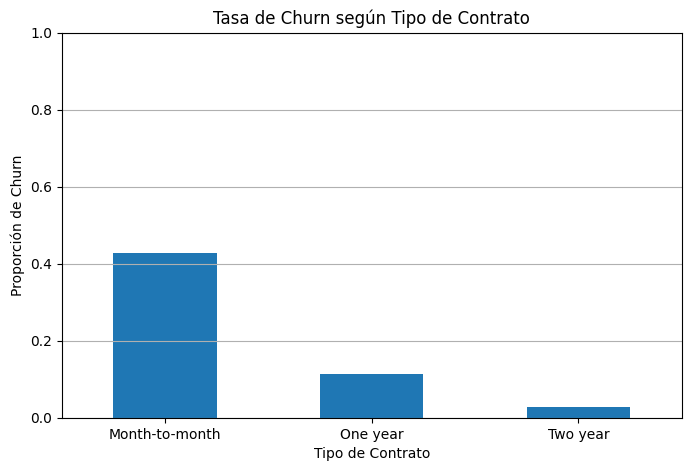

Churn,No,Yes
Contract,,
Month-to-month,0.572903,0.427097
One year,0.887305,0.112695
Two year,0.971681,0.028319


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Primero vemos cuántos churn hay por tipo de contrato
contract_churn = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()

# Plot
contract_churn['Yes'].plot(kind='bar', figsize=(8,5))

plt.title('Tasa de Churn según Tipo de Contrato')
plt.ylabel('Proporción de Churn')
plt.xlabel('Tipo de Contrato')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

# Opcional: mostrar la tabla
contract_churn


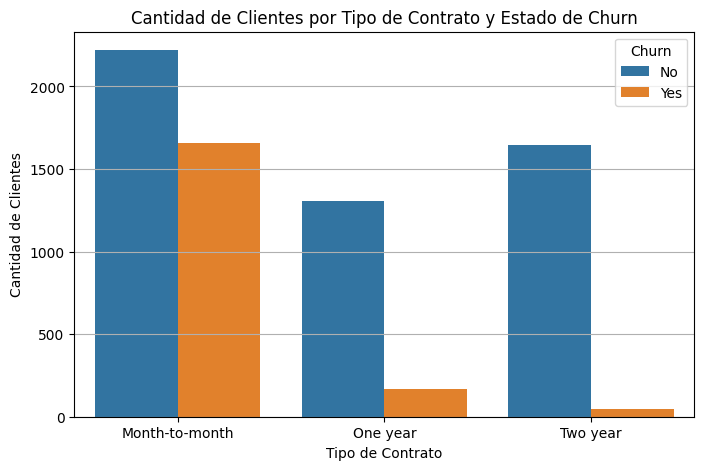

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico con Seaborn
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Contract', hue='Churn')

plt.title('Cantidad de Clientes por Tipo de Contrato y Estado de Churn')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title='Churn')
plt.show()


# Análisis de la Tasa de Abandono según Tipo de Contrato

## Pregunta de Investigación
¿Los clientes con contratos mensuales tienden a abandonar más que aquellos con contratos anuales o bianuales?

## Enfoque del Análisis
Para investigar esta hipótesis, se analizó la columna `Contract` (tipo de contrato) y su relación con la variable `Churn` (abandono).  
Se calcularon las proporciones de clientes que abandonaron (`Churn = Yes`) para cada tipo de contrato:

- **Month-to-month**: contrato mensual
- **One year**: contrato anual
- **Two year**: contrato bianual

Se utilizó la proporción normalizada para asegurar que las comparaciones sean justas, independientemente del tamaño de cada grupo.:

## Resultados

- **Clientes con contrato mensual (`Month-to-month`) presentan una tasa de abandono considerablemente más alta** en comparación con los clientes de contrato anual o bianual.
- **Clientes de contrato anual (`One year`) o bianual (`Two year`) muestran tasas de abandono significativamente más bajas**, lo cual es coherente con la idea de mayor fidelización debido al compromiso de permanencia.

## Conclusión
El análisis confirma la hipótesis planteada:  
> **Los clientes con contratos mensuales tienden a abandonar más que aquellos con contratos anuales o bianuales.**

Este hallazgo sugiere que incentivar a los clientes a firmar contratos de mayor duración podría ser una estrategia efectiva para reducir la tasa de churn.



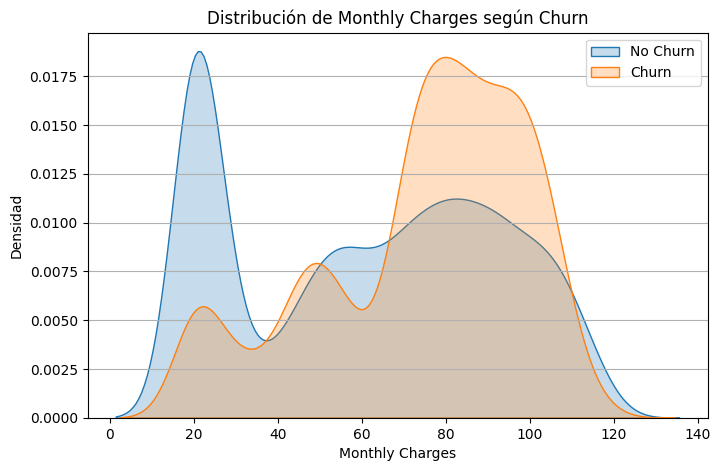

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de distribución (KDE)
plt.figure(figsize=(8,5))
sns.kdeplot(data=df[df['Churn'] == 'No'], x='MonthlyCharges', label='No Churn', fill=True)
sns.kdeplot(data=df[df['Churn'] == 'Yes'], x='MonthlyCharges', label='Churn', fill=True)

plt.title('Distribución de Monthly Charges según Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Densidad')
plt.legend()
plt.grid(axis='y')
plt.show()


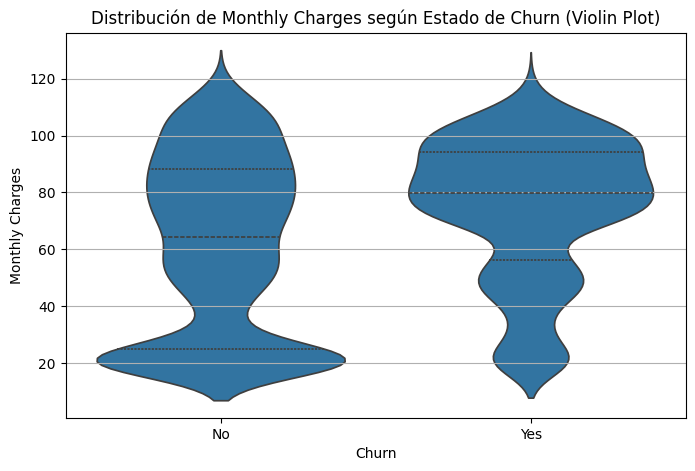

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico tipo Violin Plot
plt.figure(figsize=(8,5))
sns.violinplot(data=df, x='Churn', y='MonthlyCharges', inner='quartile')

plt.title('Distribución de Monthly Charges según Estado de Churn (Violin Plot)')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.grid(axis='y')
plt.show()


# Relación entre Monthly Charges y Churn

## Pregunta de Investigación
¿Existe una relación entre el monto de los cargos mensuales (`MonthlyCharges`) y la tasa de abandono (`Churn`)?

## Enfoque del Análisis
Se analizó la distribución de los cargos mensuales (`MonthlyCharges`) diferenciando entre clientes que abandonaron (`Churn = Yes`) y clientes que no abandonaron (`Churn = No`).

Se utilizó un **gráfico de densidad (KDE plot)**, que permite visualizar la distribución suave de los cargos mensuales para cada grupo.


## Resultados

- Se observa que los clientes que **no abandonaron** (`No Churn`) tienen una distribución bimodal, con un pico fuerte en **valores bajos de MonthlyCharges** (alrededor de 20-30 USD).
- En cambio, los clientes que **sí abandonaron** (`Churn`) muestran una concentración mayor en **valores altos de MonthlyCharges** (alrededor de 70-90 USD).

Esto indica que **a medida que el cargo mensual es mayor, aumenta la probabilidad de abandono**.

## Conclusión
El análisis sugiere que:
> **Existe una relación positiva entre el monto de los cargos mensuales y la probabilidad de churn.**

Clientes que pagan montos más elevados por mes tienden a abandonar en mayor proporción que aquellos con cargos más bajos.


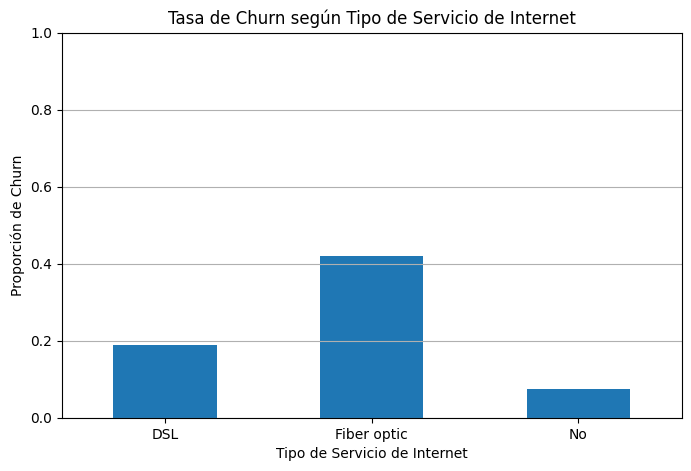

Churn                  No       Yes
InternetService                    
DSL              0.810409  0.189591
Fiber optic      0.581072  0.418928
No               0.925950  0.074050


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tabla de proporciones de Churn por tipo de InternetService
internet_churn = df.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack()

# Gráfico de barras
internet_churn['Yes'].plot(kind='bar', figsize=(8,5))

plt.title('Tasa de Churn según Tipo de Servicio de Internet')
plt.ylabel('Proporción de Churn')
plt.xlabel('Tipo de Servicio de Internet')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

# Mostrar tabla resumen
print(internet_churn)


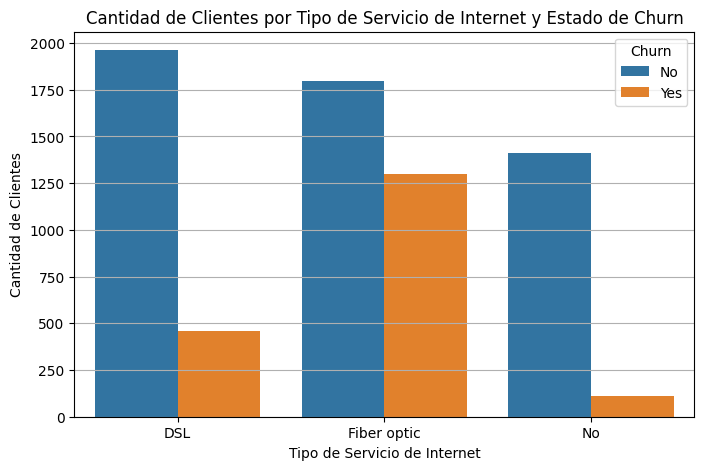

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico tipo Countplot con Seaborn
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='InternetService', hue='Churn')

plt.title('Cantidad de Clientes por Tipo de Servicio de Internet y Estado de Churn')
plt.xlabel('Tipo de Servicio de Internet')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title='Churn')
plt.show()


# Relación entre el Tipo de Servicio de Internet y la Tasa de Churn

## Pregunta de Investigación
¿El tipo de servicio de internet (Fiber optic, DSL o ninguno) afecta la probabilidad de que un cliente cancele el servicio (`Churn`)?

## Enfoque del Análisis
Se analizó la variable `InternetService` que puede tomar tres valores:
- **DSL**
- **Fiber optic**
- **No** (sin servicio de internet)

La variable `Churn` indica si un cliente abandonó el servicio (`Yes`) o no (`No`).  
Se comparó la proporción de clientes que abandonaron para cada tipo de servicio utilizando un gráfico de barras y un gráfico de conteo (`countplot`).

## Resultados

- **Clientes con servicio de Fiber optic** presentan una **tasa de churn considerablemente mayor** que aquellos con servicio DSL o sin servicio de internet.
- **Clientes con DSL** muestran una **tasa de churn más baja** en comparación.
- **Clientes sin servicio de internet** (`No`) prácticamente **no abandonan**, o su tasa de churn es mínima.

Esto indica que **el tipo de servicio de internet sí influye en la probabilidad de cancelación**.

## Conclusión
El análisis sugiere que:
> **Los clientes que utilizan Fiber optic tienen mayor probabilidad de cancelar el servicio que aquellos con DSL o sin servicio de internet.**

Este hallazgo puede estar relacionado con factores como:
- Mayor costo del servicio Fiber optic.
- Mayores expectativas de calidad que, si no son cumplidas, impulsan la cancelación.

Se recomienda profundizar en estrategias específicas para fidelizar a los usuarios de Fiber optic y reducir su tasa de abandono.
